<a href="https://colab.research.google.com/github/Hamza-benAmmar/Sentiment-analysis-/blob/main/ML_PPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('/content/concatenated_data.csv')


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data=pd.read_csv('/content/concatenated_data.csv')

data.head()

,sentiment,content
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy


In [ ]:
data['content'] = data['content'].apply(lambda a: " ".join(a.lower() for a in a.split()))
data.head()

,sentiment,content
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy


In [ ]:
data['content'] = data['content'].apply(lambda a : " ".join(a.replace('[^\w\s]','') for a in a.split()))
data.head()

,sentiment,content
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy


In [ ]:
stop = stopwords.words('english')
data['content']=data['content'].apply(lambda a: " ".join(a for a in a.split() if a not in stop))
data.head()

,sentiment,content
0,sadness,didnt feel humiliated
1,sadness,go feeling hopeless damned hopeful around some...
2,anger,im grabbing minute post feel greedy wrong
3,love,ever feeling nostalgic fireplace know still pr...
4,anger,feeling grouchy


In [ ]:
data['sentiment']=data['sentiment'].apply(lambda x:'guilt' if x=='guit' else x)
data=data.iloc[:,0:2]
data['sentiment'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: sentiment, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
object = LabelEncoder()
data['sentiment'] = object.fit_transform(data['sentiment'])
data['sentiment'].value_counts()

2    6761
4    5797
0    2709
1    2373
3    1641
5     719
Name: sentiment, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest,Ytrain,Ytest = train_test_split(data['content'],data['sentiment'],stratify= data['sentiment'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(data['content'])
cv_xtrain = cv.transform(Xtrain)
cv_xtest = cv.transform(Xtest)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
tv.fit(data['content'])
tv_xtrain = tv.transform(Xtrain)
tv_xtest = tv.transform(Xtest)

In [ ]:
from sklearn import metrics

def build(model_initializer, independent_variables_training, target, independent_variable_test):
    model_initializer.fit(independent_variables_training, target)
    modelPred = model_initializer.predict(independent_variable_test)
    return metrics.accuracy_score(Ytest, modelPred)

In [ ]:
from sklearn import naive_bayes
from sklearn import metrics

output = build(naive_bayes.MultinomialNB(), cv_xtrain, Ytrain , cv_xtest)
print("Accuracy using count vectorizer: ",output)


Accuracy using count vectorizer:  0.7702


              precision    recall  f1-score   support

           0       0.88      0.67      0.76       678
           1       0.81      0.55      0.66       593
           2       0.76      0.93      0.84      1690
           3       0.81      0.29      0.42       410
           4       0.74      0.94      0.83      1449
           5       0.76      0.07      0.13       180

    accuracy                           0.77      5000
   macro avg       0.79      0.58      0.61      5000
weighted avg       0.78      0.77      0.74      5000



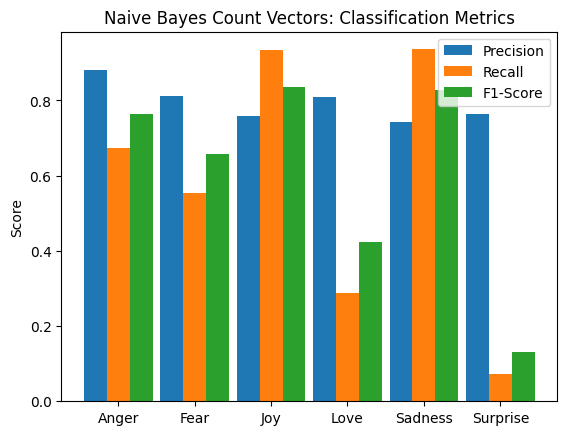

In [ ]:
import matplotlib.pyplot as plt
from sklearn import naive_bayes
from sklearn.metrics import classification_report

# Train the classifier
classifier = naive_bayes.MultinomialNB().fit(cv_xtrain, Ytrain)

# Make predictions
val_predictions = classifier.predict(cv_xtest)
y_true, y_pred = Ytest, val_predictions
model_name="Naive Bayes Count Vectors"
# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)
print(classification_report(y_true, y_pred))

# Extract precision, recall, and F1-score from the report
classes = list(report.keys())[:-3]
custom_labels = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']
precision = [report[class_name]['precision'] for class_name in classes]
recall = [report[class_name]['recall'] for class_name in classes]
f1_score = [report[class_name]['f1-score'] for class_name in classes]

# Plotting the results
x = np.arange(len(classes))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title(model_name+': Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(custom_labels)
ax.legend()

plt.show()

In [ ]:
from sklearn import naive_bayes
from sklearn import metrics

output = build(naive_bayes.MultinomialNB(), tv_xtrain, Ytrain , tv_xtest)
print("Accuracy using count tfidf: ",output)

Accuracy using count tfidf:  0.6618


              precision    recall  f1-score   support

           0       0.93      0.28      0.43       678
           1       0.91      0.22      0.35       593
           2       0.62      0.97      0.75      1690
           3       1.00      0.03      0.06       410
           4       0.67      0.92      0.78      1449
           5       0.00      0.00      0.00       180

    accuracy                           0.66      5000
   macro avg       0.69      0.40      0.40      5000
weighted avg       0.72      0.66      0.59      5000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

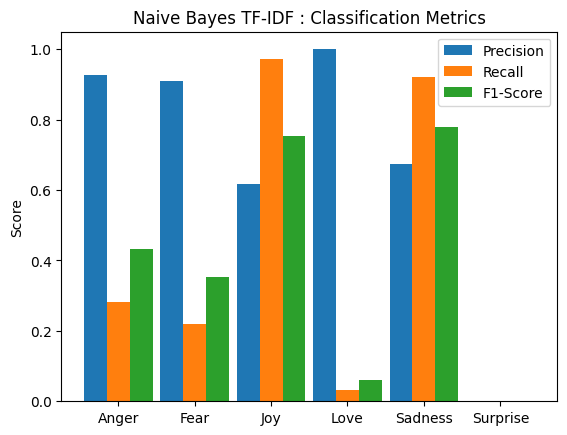

In [ ]:

# Train the classifier
classifier = naive_bayes.MultinomialNB().fit(tv_xtrain, Ytrain)

# Make predictions
val_predictions = classifier.predict(tv_xtest)
y_true, y_pred = Ytest, val_predictions
model_name="Naive Bayes TF-IDF"
# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)
print(classification_report(y_true, y_pred))
custom_labels = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']

# Extract precision, recall, and F1-score from the report
classes = list(report.keys())[:-3]
precision = [report[class_name]['precision'] for class_name in classes]
recall = [report[class_name]['recall'] for class_name in classes]
f1_score = [report[class_name]['f1-score'] for class_name in classes]

# Plotting the results
x = np.arange(len(classes))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title(model_name+' : Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(custom_labels)
ax.legend()

plt.show()

In [ ]:
from sklearn import linear_model
from sklearn import metrics

output = build(linear_model.LogisticRegression(), cv_xtrain, Ytrain , cv_xtest)
print("Accuracy using count vectorizer: ",output)

Accuracy using count vectorizer:  0.89


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.88      0.88      0.88       678
           1       0.85      0.82      0.83       593
           2       0.90      0.93      0.92      1690
           3       0.84      0.78      0.81       410
           4       0.92      0.93      0.93      1449
           5       0.78      0.69      0.73       180

    accuracy                           0.89      5000
   macro avg       0.86      0.84      0.85      5000
weighted avg       0.89      0.89      0.89      5000



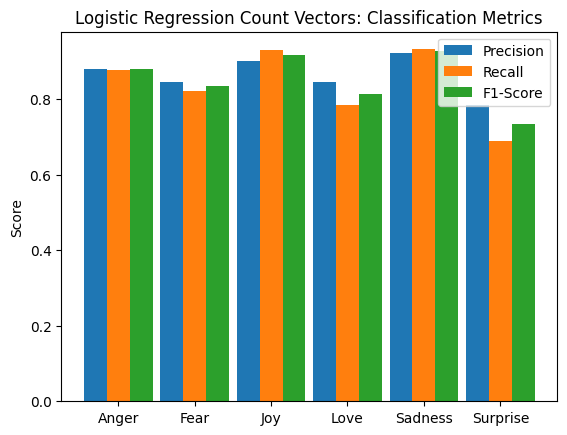

In [ ]:

# Train the classifier
classifier = linear_model.LogisticRegression().fit(cv_xtrain, Ytrain)
model_name = "Logistic Regression Count Vectors"

# Make predictions
val_predictions = classifier.predict(cv_xtest)
y_true, y_pred = Ytest, val_predictions
# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)
print(classification_report(y_true, y_pred))
custom_labels = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']


# Extract precision, recall, and F1-score from the report
classes = list(report.keys())[:-3]
precision = [report[class_name]['precision'] for class_name in classes]
recall = [report[class_name]['recall'] for class_name in classes]
f1_score = [report[class_name]['f1-score'] for class_name in classes]

# Plotting the results
x = np.arange(len(classes))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title(model_name+': Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(custom_labels)
ax.legend()

plt.show()

In [ ]:
from sklearn import linear_model
from sklearn import metrics

output = build(linear_model.LogisticRegression(), tv_xtrain, Ytrain , tv_xtest)
print("Accuracy using count tfidf: ",output)

Accuracy using count tfidf:  0.86


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.89      0.81      0.85       678
           1       0.86      0.75      0.80       593
           2       0.82      0.96      0.88      1690
           3       0.90      0.60      0.72       410
           4       0.89      0.94      0.91      1449
           5       0.90      0.49      0.63       180

    accuracy                           0.86      5000
   macro avg       0.88      0.76      0.80      5000
weighted avg       0.86      0.86      0.85      5000



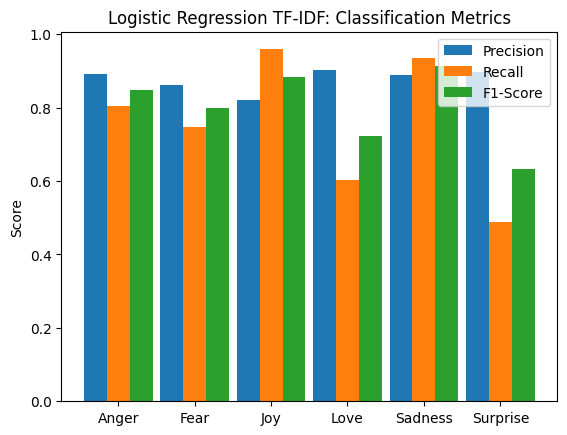

In [ ]:


# Train the classifier
classifier = linear_model.LogisticRegression().fit(tv_xtrain, Ytrain)
model_name = "Logistic Regression TF-IDF"

# Make predictions
val_predictions = classifier.predict(tv_xtest)
y_true, y_pred = Ytest, val_predictions
# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)
print(classification_report(y_true, y_pred))
custom_labels = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']


# Extract precision, recall, and F1-score from the report
classes = list(report.keys())[:-3]
precision = [report[class_name]['precision'] for class_name in classes]
recall = [report[class_name]['recall'] for class_name in classes]
f1_score = [report[class_name]['f1-score'] for class_name in classes]

# Plotting the results
x = np.arange(len(classes))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title(model_name+': Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(custom_labels)
ax.legend()

plt.show()

In [ ]:
from sklearn import svm
from sklearn import metrics

output = build(svm.SVC(), cv_xtrain, Ytrain , cv_xtest)
print("Accuracy using count vectorizer: ",output)

Accuracy using count vectorizer:  0.8184


              precision    recall  f1-score   support

           0       0.89      0.72      0.79       678
           1       0.82      0.68      0.75       593
           2       0.74      0.95      0.83      1690
           3       0.90      0.47      0.62       410
           4       0.89      0.91      0.90      1449
           5       0.88      0.44      0.59       180

    accuracy                           0.82      5000
   macro avg       0.85      0.70      0.75      5000
weighted avg       0.83      0.82      0.81      5000



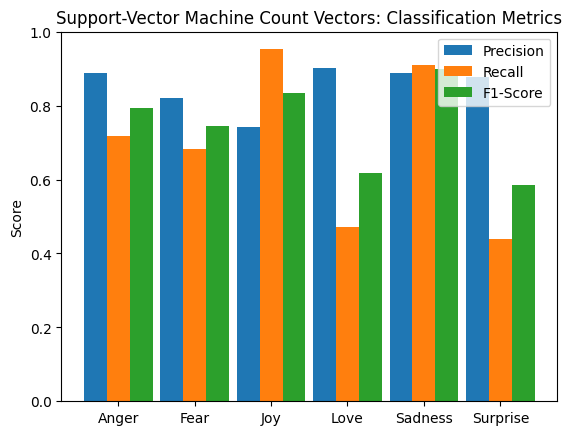

In [ ]:


# Train the classifier
classifier = svm.SVC().fit(cv_xtrain, Ytrain)
model_name = "Support-Vector Machine Count Vectors"

# Make predictions
val_predictions = classifier.predict(cv_xtest)
y_true, y_pred = Ytest, val_predictions
# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)
print(classification_report(y_true, y_pred))
custom_labels = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']


# Extract precision, recall, and F1-score from the report
classes = list(report.keys())[:-3]
precision = [report[class_name]['precision'] for class_name in classes]
recall = [report[class_name]['recall'] for class_name in classes]
f1_score = [report[class_name]['f1-score'] for class_name in classes]

# Plotting the results
x = np.arange(len(classes))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title(model_name+': Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(custom_labels)
ax.legend()

plt.show()

In [ ]:
from sklearn import svm
from sklearn import metrics

output = build(svm.SVC(), tv_xtrain, Ytrain , tv_xtest)
print("Accuracy using count tfidf: ",output)

Accuracy using count tfidf:  0.8448


              precision    recall  f1-score   support

           0       0.89      0.78      0.83       678
           1       0.83      0.74      0.78       593
           2       0.79      0.95      0.86      1690
           3       0.90      0.53      0.67       410
           4       0.90      0.93      0.91      1449
           5       0.84      0.48      0.61       180

    accuracy                           0.84      5000
   macro avg       0.86      0.73      0.78      5000
weighted avg       0.85      0.84      0.84      5000



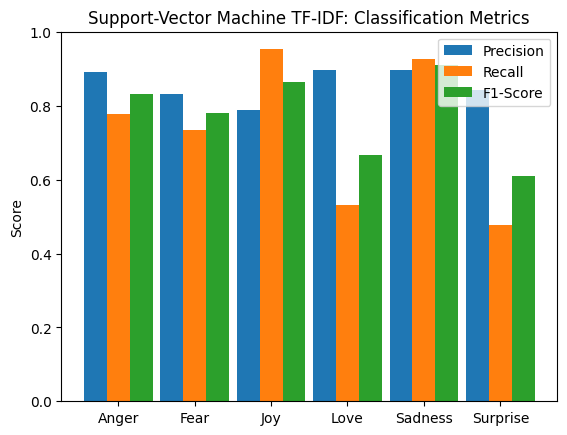

In [ ]:


# Train the classifier
classifier = svm.SVC().fit(tv_xtrain, Ytrain)
model_name = "Support-Vector Machine TF-IDF"

# Make predictions
val_predictions = classifier.predict(tv_xtest)
y_true, y_pred = Ytest, val_predictions
# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)
print(classification_report(y_true, y_pred))
custom_labels = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']


# Extract precision, recall, and F1-score from the report
classes = list(report.keys())[:-3]
precision = [report[class_name]['precision'] for class_name in classes]
recall = [report[class_name]['recall'] for class_name in classes]
f1_score = [report[class_name]['f1-score'] for class_name in classes]

# Plotting the results
x = np.arange(len(classes))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title(model_name+': Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(custom_labels)
ax.legend()

plt.show()

In [ ]:
from sklearn import ensemble
from sklearn import metrics

output = build(ensemble.RandomForestClassifier(), cv_xtrain, Ytrain , cv_xtest)
print("Accuracy using count vectorizer: ",output)

Accuracy using count vectorizer:  0.8828


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       678
           1       0.84      0.83      0.84       593
           2       0.90      0.90      0.90      1690
           3       0.81      0.72      0.76       410
           4       0.92      0.92      0.92      1449
           5       0.74      0.76      0.75       180

    accuracy                           0.88      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.88      0.88      0.88      5000



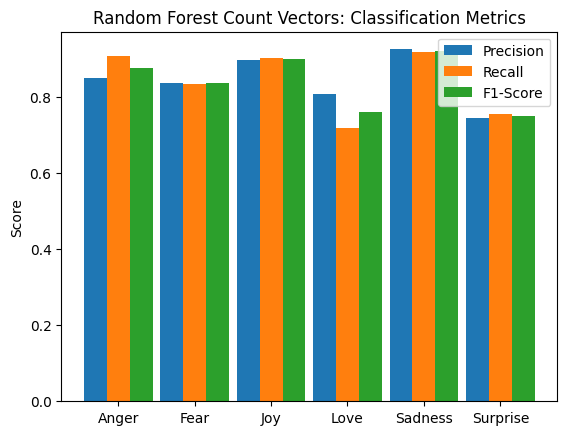

In [ ]:


# Train the classifier
classifier = ensemble.RandomForestClassifier().fit(cv_xtrain, Ytrain)
model_name = "Random Forest Count Vectors"

# Make predictions
val_predictions = classifier.predict(cv_xtest)
y_true, y_pred = Ytest, val_predictions
# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)
print(classification_report(y_true, y_pred))
custom_labels = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']


# Extract precision, recall, and F1-score from the report
classes = list(report.keys())[:-3]
precision = [report[class_name]['precision'] for class_name in classes]
recall = [report[class_name]['recall'] for class_name in classes]
f1_score = [report[class_name]['f1-score'] for class_name in classes]

# Plotting the results
x = np.arange(len(classes))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title(model_name+': Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(custom_labels)
ax.legend()

plt.show()


In [ ]:
from sklearn import ensemble
from sklearn import metrics

output = build(ensemble.RandomForestClassifier(), tv_xtrain, Ytrain , tv_xtest)
print("Accuracy using count tfidf: ",output)

Accuracy using count tfidf:  0.8784


              precision    recall  f1-score   support

           0       0.84      0.91      0.88       678
           1       0.83      0.85      0.84       593
           2       0.91      0.90      0.90      1690
           3       0.80      0.75      0.77       410
           4       0.93      0.92      0.92      1449
           5       0.79      0.73      0.76       180

    accuracy                           0.88      5000
   macro avg       0.85      0.84      0.85      5000
weighted avg       0.88      0.88      0.88      5000



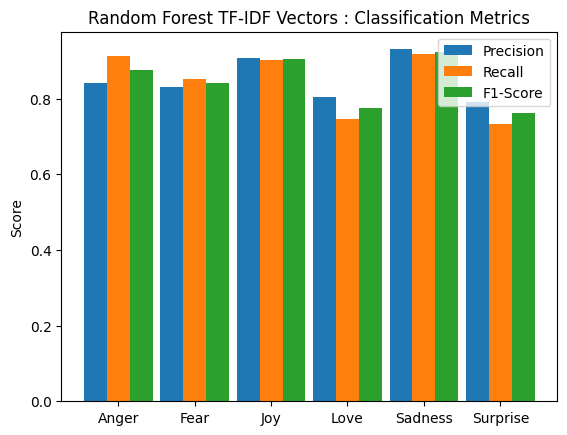

In [ ]:


# Train the classifier
classifier = ensemble.RandomForestClassifier().fit(cv_xtrain, Ytrain)
model_name = "Random Forest TF-IDF Vectors "

# Make predictions
val_predictions = classifier.predict(cv_xtest)
y_true, y_pred = Ytest, val_predictions
# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)
print(classification_report(y_true, y_pred))
custom_labels = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']


# Extract precision, recall, and F1-score from the report
classes = list(report.keys())[:-3]
precision = [report[class_name]['precision'] for class_name in classes]
recall = [report[class_name]['recall'] for class_name in classes]
f1_score = [report[class_name]['f1-score'] for class_name in classes]

# Plotting the results
x = np.arange(len(classes))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title(model_name+': Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(custom_labels)
ax.legend()

plt.show()

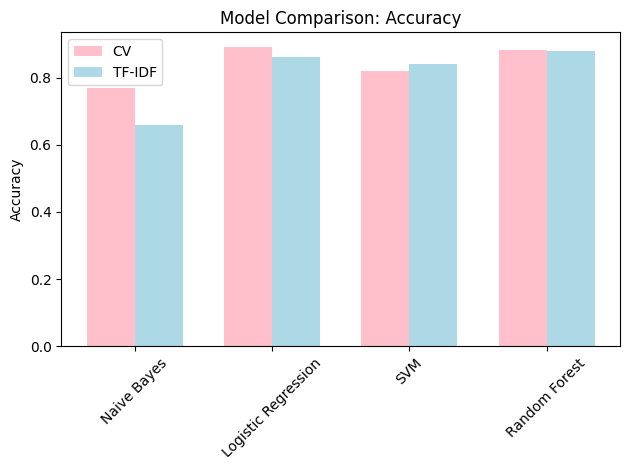

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding accuracy values
models = [
    'Naive Bayes',
    'Logistic Regression',
    'SVM',
    'Random Forest'
]
accuracies_cv = [0.7702, 0.89, 0.8184, 0.8828]
accuracies_tfidf = [0.66 ,  0.86,  0.84 , 0.88]

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions = np.arange(len(models))

# Create the figure and axes
fig, ax = plt.subplots()

# Create the bars for CV accuracy
ax.bar(bar_positions - bar_width/2, accuracies_cv, width=bar_width, color='pink', label='CV')

# Create the bars for TF-IDF accuracy
ax.bar(bar_positions + bar_width/2, accuracies_tfidf, width=bar_width, color='lightblue', label='TF-IDF')

# Set the x-axis ticks and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(models, rotation=45)

# Set the y-axis label
ax.set_ylabel('Accuracy')

# Set the title
ax.set_title('Model Comparison: Accuracy')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
